In [1]:
import numpy as np
import string
import matplotlib as plt
import matplotlib.patheffects as mpe
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk import download
nltk.download('punkt')
nltk.download ('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import collections
import copy

In [4]:
filename = 'HP.txt'

In [ ]:
with open("HP.txt", "r", encoding="utf-8") as f:
    text = f.read()
    print(text)

In [6]:
def clean_text(text):
    text = text.lower()
    text = word_tokenize(text)
    text_clean = [word for word in text if word not in set(stop_words) and word[0].isalpha()]
    return text_clean

norm_text = clean_text(text)
print(norm_text)

['letter', 'arrives', 'unhappy', 'ordinary', 'harry', 'potter', 'decade-old', 'secret', 'revealed', 'parents', 'wizards', 'killed', 'dark', 'lord', 'curse', 'harry', 'baby', 'somehow', 'survived', 'escaping', 'unbearable', 'muggle', 'guardians', 'hogwarts', 'wizarding', 'school', 'brimming', 'ghosts', 'enchantments', 'harry', 'stumbles', 'sinister', 'adventure', 'finds', 'three-', 'headed', 'dog', 'guarding', 'room', 'third', 'floor', 'hears', 'missing', 'stone', 'astonishing', 'powers', 'could', 'valuable', 'dangerous', 'funny', 'imaginative', 'magical', 'rowling', 'woken', 'whole', 'generation', 'reading', 'thirty-something', 'book-lovers', 'know', 'smug', 'references', 'diagon', 'alley', 'quidditch', 'times', 'terrific', 'book', 'sunday', 'telegraph', 'makings', 'classic', 'rowling', 'uses', 'classic', 'narrative', 'devices', 'flair', 'originality', 'delivers', 'complex', 'demanding', 'plot', 'form', 'hugely', 'entertaining', 'thriller', 'scotsman', 'thought', 'wizardry', 'children'

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

In [8]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def get_lemmas(text):
  spacy_token = []
  doc = nlp(' '.join(text))
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
        spacy_token.append(token.lemma_)
  return spacy_token

example_lem = get_lemmas(norm_text)
example_lem

In [10]:
def splitIntoChapters(textList):

  bookLength = 0 #общее число слов
  chapterLocations = [] #расположение глав в книге
  chapterPos = [] #относительное расположение глав в книге (число с плавающей точкой)
  for i in range(len(textList)):
    bookLength+=1
  for i in range(len(textList)):
    if textList[i] == "chapter":
      chapterLocations.append(i/bookLength)
  chapterLocations.append(1)
  graphPoints = np.array_split(chapterLocations, len(chapterLocations)) #делим число глав
  for i in graphPoints:
    chapterPos.append(i.item(0))
  return chapterPos

In [11]:
chapterPosition = splitIntoChapters(norm_text) #список расположения глав относительно длины книги
chapterPositionWords = [i * len(norm_text) for i in chapterPosition] #список расположения глав относительно количества слов, с которых начинается глава

In [30]:
def colorSum(textList):
  from collections import defaultdict
  colors1 = []

  colors_dict = defaultdict(int)

  colors = ['white','yellow','silver','gold','purple','black','red','green','blue']

  for i in textList:
    if i in colors:
      colors_dict[i] += 1 #создаем словарь с цветами и соответствующими значениями

  for i in colors:
    colors1.append(colors_dict[i]) #список с целыми числами (количество упоминаний в тексте)
  return (colors1)

In [31]:
def countColorInChapters(textList, chapterWordLocation):

  colorCount = []
  for i in range(1,len(chapterWordLocation)):
    start = int(chapterWordLocation[i-1]) #слово, означающее начало главы
    end = int(chapterWordLocation[i]) #слово, означающее окончание главы
    colorCount.append(colorSum(textList[start:end])) #считаем общее количество цветов в книге
  return colorCount

In [32]:
colorCount = countColorInChapters(norm_text, chapterPositionWords)
colorCount

[[0, 0, 3, 0, 1, 3, 0, 0, 1],
 [0, 0, 0, 1, 2, 1, 1, 3, 1],
 [1, 1, 0, 0, 1, 1, 1, 3, 0],
 [1, 0, 0, 0, 0, 3, 0, 3, 0],
 [2, 0, 9, 9, 1, 6, 2, 2, 0],
 [1, 1, 3, 2, 0, 4, 6, 3, 0],
 [0, 0, 3, 2, 1, 4, 0, 2, 1],
 [0, 0, 1, 0, 0, 3, 2, 1, 0],
 [3, 1, 1, 1, 0, 1, 1, 0, 0],
 [1, 0, 1, 2, 1, 3, 2, 0, 0],
 [0, 0, 1, 4, 0, 0, 2, 1, 2],
 [3, 2, 3, 2, 0, 2, 1, 3, 2],
 [0, 0, 1, 3, 0, 1, 2, 1, 0],
 [0, 0, 0, 0, 0, 2, 0, 2, 1],
 [2, 0, 2, 0, 0, 2, 3, 1, 2],
 [14, 0, 2, 0, 3, 15, 0, 0, 2],
 [3, 0, 2, 3, 1, 0, 2, 2, 0]]

In [33]:
def graphColorsNarrativeTimeLine(colorCount,chapterPosition,bookTitle):
  colors = ['white','yellow','silver','gold','purple','black','red','green','blue']
  xvalues = []
  yvalues = []
  x = []
  chapterList = []

  fig = plt.figure(figsize=(15,8))
  ax1 = fig.add_subplot(111)
  ax1.set_xlim(left = 0,right = 1.3)
  ax1.set_xlabel('Position in a book')
  ax1.set_ylabel('Frequency of color-related words')
  ax1.set_title('The Usage of Color Over Time in HP')

  colorCount.append([0,0,0,0,0,0,0,0,0])
  for i in range(len(chapterPosition)):
    for j in range(len(colorCount[0])):
      ax1.scatter(chapterPosition[i], colorCount[i][j], c = colors[j], edgecolor = 'black')
  for i in chapterPosition:
      xvalues.append(i)

  for j in range(len(colorCount[0])):
    x = []
    yvalues.append(x)
    for i in range(len(colorCount)):
      x.append(colorCount[i][j])

  pe = [mpe.Stroke(linewidth=2, foreground='black'),
        mpe.Stroke(foreground='black', alpha=1),
        mpe.Normal()]
  for i in range(len(colorCount[0])):
    ax1.plot(xvalues, yvalues[i], label='{}'.format(colors[i]), marker='o', color = colors[i], path_effects = pe)

  for i in range(len(chapterPosition)):
    if (i == 0):
      chapterList.append('start')
    elif (i == len(chapterPosition)-1):
      chapterList.append('End of Chapter' + str(i))
    else:
      chapterList.append("Chapter " + str(i))

  list3 = []
  list4 = []
  for i in range(len(chapterPosition)):
    plt.axvline(x = chapterPosition[i],color = 'black', linestyle = ":")
    list3.append(chapterPosition[i])
    list4.append(chapterList[i])
  plt.xticks(list3,list4)
  ax1.legend()

  colorCount.remove([0,0,0,0,0,0,0,0,0])
  return ax1

<Axes: title={'center': 'The Usage of Color Over Time in HP'}, xlabel='Position in a book', ylabel='Frequency of color-related words'>

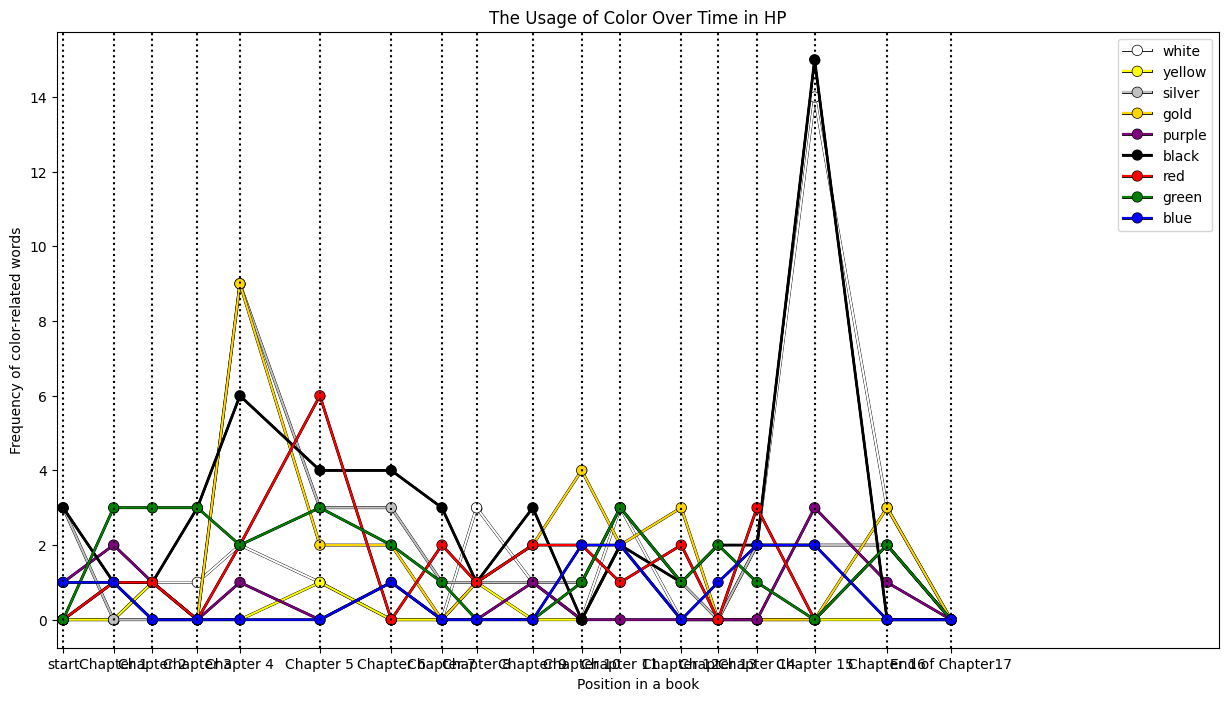

In [34]:
graphColorsNarrativeTimeLine(colorCount,chapterPosition, 'Harry Potter')

In [22]:
def maxVal(list1):
  maxValue = 0
  for i in range(len(list1)):
    for j in range(len(list1)):
      if (list1[i][j] > maxValue):
        maxValue = list1[i][j]
  return maxValue

In [35]:
def graphColorsNarrativeTimeBar(colorCount,chapterPosition,bookTitle):
  colors = ['White','Yellow','Silver','Gold','Purple','Black','Red','Green','Blue']

  fig = plt.figure(figsize=(20,15), dpi=80)
  ax1 = fig.add_subplot(111)

  ax1.set_xlabel('Relative position in book', fontsize = 15)
  ax1.set_ylabel('Frequency of color-related words', fontsize = 15)
  ax1.set_title('The Usage of Color Over Time in ' + bookTitle, fontsize = 15)

  xvals = np.arange(len(colorCount[0]))
  colorxs = []
  colorys = colors[:]
  colorystemp = [colorys[i][0:2] for i in range(len(colorys))]  #сокращения названия цветов
  colorys = colorystemp[:]
  xvalsplot = []
  vLineTrack = []
  for i in range(len(colorCount)):
    ax1.bar(xvals+(i*len(chapterPosition)),colorCount[i], width = 1, edgecolor = 'black',color = colors)
    colorxs.extend((xvals+(i*len(chapterPosition))).tolist()) #там, где должны быть отметки о цвете
    colorys.extend(colorystemp) #соответствующие метки
    vLineTrack.extend([len(colorCount[0])-1+len(chapterPosition)*i]) #вертикальные линии

  height = maxVal(colorCount)
  plt.xticks(colorxs,colorys,fontsize = 10)
  fig.set_size_inches(len(chapterPosition)*3, height+1)

  xvalsplot = colorxs[:] #глубокая копия
  vLines = [] #список для построения вертикальных линий


  for i in range(len(xvalsplot)):
    if (xvalsplot[i] in vLineTrack):
      vLines.append(xvalsplot[i]+1)

  for i in range(len(vLines)):
    plt.axvline(x = vLines[i],color = 'black', linestyle = ":")


  chapterLabels = []

  for i in range(0,len(vLines)):
    chapterLabels.append('Chp. ' + str(i+1))


  for i in range(0,len(chapterLabels)):
    ax1.text((i*len(chapterPosition))+(len(colorCount[0])-1)/2,height,chapterLabels[i], fontsize = 15)

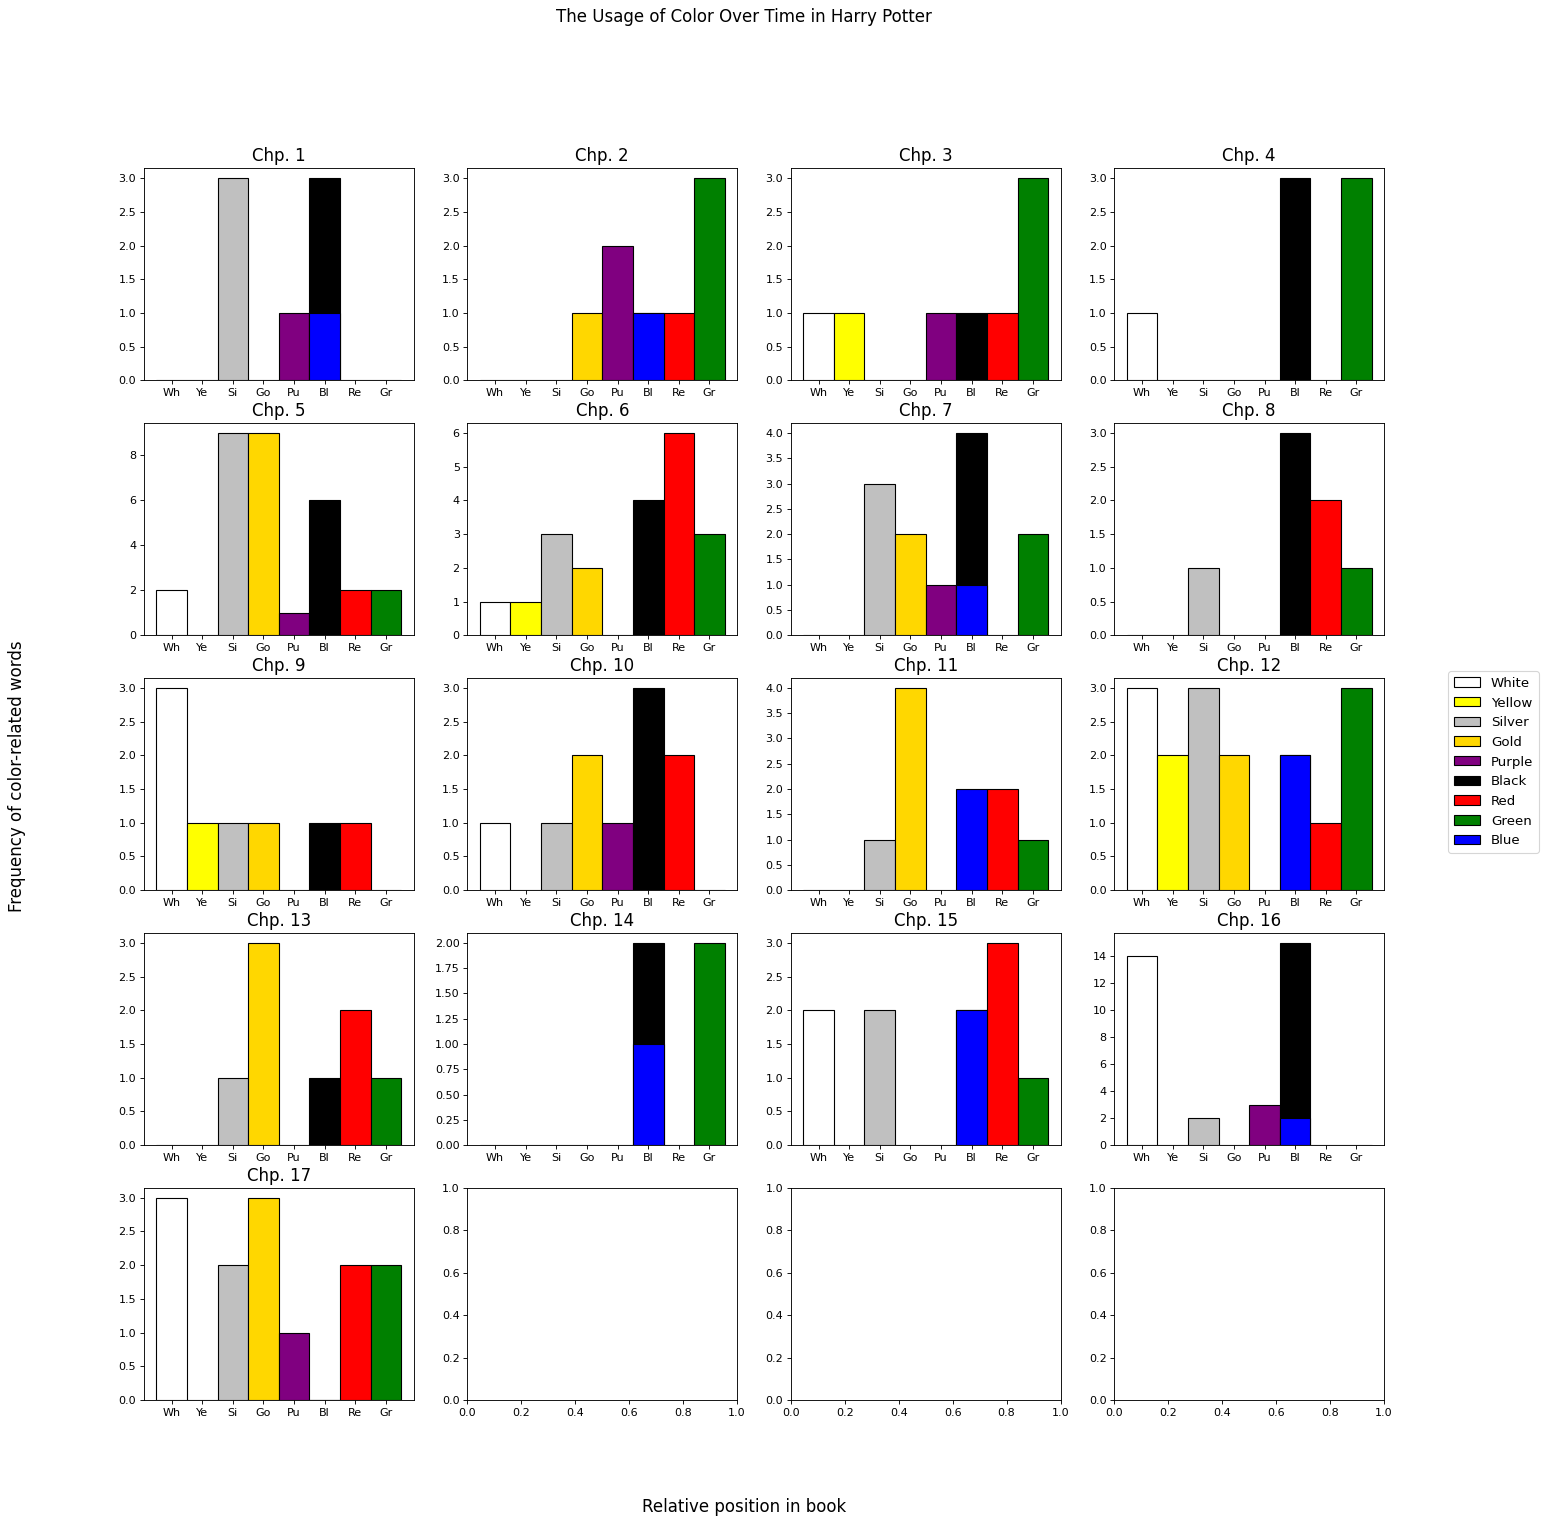

In [36]:
colors = ['White','Yellow','Silver','Gold','Purple','Black','Red','Green','Blue']
x = [i[0:2] for i in colors]
fig, axs =  plt.subplots(nrows= 5 , ncols= 4, figsize=(20,20), dpi=80)
fig.suptitle('The Usage of Color Over Time in ' + 'Harry Potter', fontsize = 15)
fig.text(0.5, 0.04, 'Relative position in book', ha='center', fontsize = 15)
fig.text(0.04, 0.5, 'Frequency of color-related words', va='center', rotation='vertical', fontsize = 15)

coords = []
coordy = 0
for coordx in range(5):
  for coordy in range(4):
    coords.append([coordx, coordy])
    if coordx == 4 and coordy > 0:
      break

count = 0
stop = False
for coordx in range(5):
    for coordy in range(4):
      axs[coordx, coordy].bar(x, colorCount[count], width = 1, edgecolor = 'black', color = colors, label=colors)
      axs[coordx, coordy].set_title('Chp. ' + str(count+1), fontsize=15)
      handles, labels = axs[coordx, coordy].get_legend_handles_labels()
      count += 1
      if (coordx == 4 and coordy > 0) or count == 17:
        stop = True
        break
    if stop == True:
      break
fig.legend(handles, labels, loc='center right', fontsize='large');